# RLC Schwingkreis

Betrachtet wird der Einschaltvorgang eines RLC Serienschwingkreises mit

$$U_0 = 1 \text{ V} \quad R = 10 \Omega \quad L = 10 \text{ mH} \quad C = 100 \text{ nF}$$

Dieses System wurde bereits mit dem 5-Punkte-Schema für Simulink aufbereitet und simuliert. Dabei lassen sich die meisten Schritte wiederverwenden. Die Modellskizze des *ersten Schrittes* ist

![RLC_Schwingkreis](RLC_Schwingkreis.png)

Im *zweiten Schritt* werden die Zustandsgleichung betrachtet. Hier wird nicht die integrale Form benötigt, sondern die differentielle Form mit den jeweiligen Ableitungen nach der Zeit. Die beiden Zustandsgleichungen lauten somit

$$u_L(t) = L \cdot \frac{d}{dt}i(t) \quad \text{und} \quad i(t) = C \cdot \frac{d}{dt}u_C(t)$$

Die Bilanzgleichung des *dritten Schrittes* ist hier lediglich die Maschengleichung

$$U_0 = u_R(t) + u_L(t) + u_C(t)$$

Im *vierten Schritt* werden die statischen Grundbeziehungen formuliert. Hier ist dies lediglich das Ohm'sche Gesetz am Widerstand $R$.

$$u_R(t) = R \cdot i(t)$$

Das Blockschaltbild des *fünften Schrittes* wird hier nicht betrachtet. Anstelle dieses Schrittes wird die Zustandsfunktion `xpunkt_rlc()` implementiert.

Ziel der Aufgabe ist es, jeweils einen Plot der Zeitverläufe der Spannungen $u_C(t)$ und $u_L(t)$ zu erstellen. Gehen Sie dazu folgendermaßen vor:

1. Vervollständigen Sie die Funktion `xpunkt_rlc()` mit den Gleichungen der *Schritte zwei* bis *vier*.
2. Lösen Sie die Differentialgleichung mit `ode45()` im Bereich zwischen $0 \ldots 10 \text{ ms}$. Zu Beginn sei der Kondensator ungeladen und die Induktivität stromlos.
3. Ermittlen Sie aus der Lösung der Differentialgleichung die Kondensatorspannung $u_C(t)$ und die induzierte Spannung $u_L(t)$ der Induktivität und legen Sie diese in den Variablen uC bzw. uL ab.
4. Plotten Sie die Ergebnisse der Kondensatorspannnung $u_C(t)$ und der induzierten Spannung $u_L(t)$.

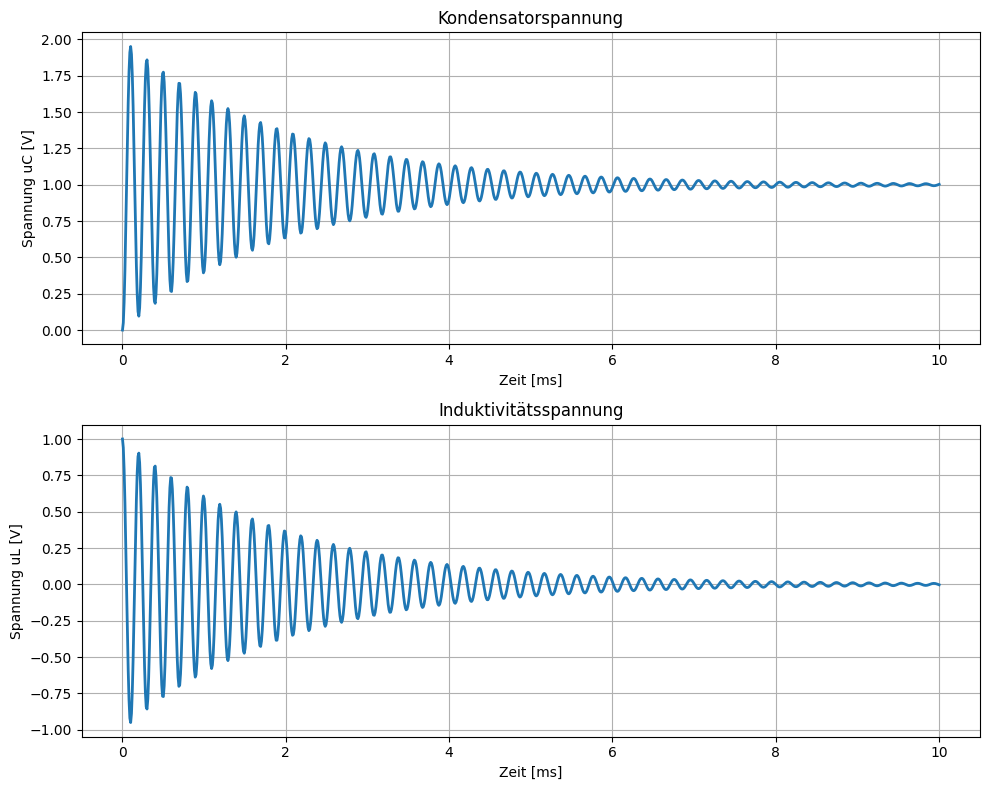

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def xpunkt_rlc(t, x, U0, R, L, C):
    """
    Differentialgleichung des RLC-Schwingkreises
    
    Parameter:
    x[0] = uC (Kondensatorspannung)
    x[1] = i (Strom)
    """
    uC = x[0]
    i = x[1]
    uC_punkt = i/C
    i_punkt = (U0 - R*i - uC)/L
    return [uC_punkt, i_punkt]

# Parameter
U0 = 1        # Quellenspannung 1V
R = 10        # Widerstand 10Ω
L = 10e-3     # Induktivität 10mH
C = 100e-9    # Kapazität 100nF

# Numerische Lösung mit höherer Genauigkeit
solution = solve_ivp(
    lambda t, x: xpunkt_rlc(t, x, U0, R, L, C),
    [0, 10e-3],         # Zeitintervall
    [0, 0],             # Anfangswerte: uC = 0V, i = 0A
    method='RK45',
    rtol=1e-8,
    atol=1e-10,
    dense_output=True
)

# Gleichmäßiges Zeitraster für glatte Kurven
t = np.linspace(0, 10e-3, 1000)
x = solution.sol(t)
uC = x[0]     # Kondensatorspannung
i = x[1]      # Strom
uL = U0 - R*i - uC  # Spannungsabfall an der Induktivität

# Grafische Darstellung
plt.figure(figsize=(10, 8))

# Kondensatorspannung
plt.subplot(2, 1, 1)
plt.plot(t*1e3, uC, linewidth=2)
plt.xlabel('Zeit [ms]')
plt.ylabel('Spannung uC [V]')
plt.title('Kondensatorspannung')
plt.grid(True)

# Induktivitätsspannung
plt.subplot(2, 1, 2)
plt.plot(t*1e3, uL, linewidth=2)
plt.xlabel('Zeit [ms]')
plt.ylabel('Spannung uL [V]')
plt.title('Induktivitätsspannung')
plt.grid(True)

plt.tight_layout()
plt.show()